In [1]:
from sklearn import preprocessing
import numpy as np

In [2]:
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5 , 150.1],
                     [6000.6 , -125.1],
                     [9000.9 , -673.1]])

In [3]:
scaler = preprocessing.StandardScaler()

In [4]:
features_standardized = scaler.fit_transform(features)

In [5]:
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
round(features_standardized[:,0].mean())

0

In [7]:
features_standardized[:,0].std()

0.9999999999999999

In [3]:
from keras import models
from keras import layers

In [4]:
# 신경망 모델 만들기
#해결에서 두개의 층 신경망 만들었음(층 개수에는 input layer는 포함않음)
network = models.Sequential()

In [5]:
#렐루 활성화 함수를 사용한 완전 연결층을 추가하기
# 첫번째 은닉층은 units=16 activation=relu , 렐루 활성화 함수를 가진 16개의 유닛으로 구성
# 케라스에서 네트워크의 첫번 째 은닉층은 input_shape 매개변수를 가져야함. ex)  (10,)은 첫번째층이 10개의 특성을 가진 샘플을 기대한단뜻
network.add(layers.Dense(units=16,activation='relu',input_shape=(10,)))

In [6]:
# 렐루 활성화 함수를 사용한 완전 연결층을 추가하기
# 두번째 층은 input_shape이 없는것만 다르고 동일
network.add(layers.Dense(units=16,activation='relu'))

In [7]:
# 시그모이드 활성화 함수를 사용한 완전 연결층을 추가하기
#이 네트워크는 이진 분류가 목적이므로 출력층은 시그모이드 활성화 함수를 사용한 유닛 하나만 포함 , 0 과 1
network.add(layers.Dense(units=1, activation='sigmoid'))

In [8]:
#신경망 모델 설정을 완료하기
#모델을 훈련하기전 케라스에게 네트워크의 훈련방법알려줘야함, compile 메서드에서 최적화알고리즘(RMSProp), 손실함수(binary_crossentropy)
network.compile(loss='binary_crossentropy', #바이너리 크로스엔트로피
                optimizer='rmsprop', #옵티마이저
                metrics=['accuracy']) #성능 지표 

### 신경망의 구조
1) 여러개의 입력 받기

2) 각 입력을 모델 파라미터와 곱하기

3) 모든 입력에 대한 가중치를 곱하고 절편(일반적으로 0)을 더하기

4) 활성화 함수를 적용하기

5) 다음층에 있는 유닛으로 출력을 보내기

#### 각 은닉층과 출력층에 대해 사용할 유닛 개수와 활성화 함수 정의하기
** 층에 유닛을 많이 추가할수록 복잡한 패턴을 학습 가능하지만 overfitting문제와 시간이 오래걸림

** 은닉층에 많이 사용되는 활성화 함수는 ReLU렐루 

** max(0,z) z는 가중치가 적용된 입력과 절편의 합  (z가 0보다 크면 z를반환, 그렇지않으면 0) 

#### 네트워크에 사용될 여러 은닉층 정의하기
#### 출력층의 활성화 함수를 정의하기
** 이진분류  (시그모이드 함수)

** 다중분류 (소프트맥스 활성화 함수와 k 개의 유닛)

** 회귀 (하나의 유닛)
#### 손실함수 정의하기
** 이진분류 (이진 크로스엔트로피)

** 다중분류 (범주형 크로스엔트로피)

** 회귀 (평균 제곱 오차 mse)
#### 옵티마이저 정의하기  ( 가장 작은 손실 함수 오차를 만드는 파라미터 값을 찾음)
** 확률적 경사하강법 gradient descent

** 모멘텀을 사용한 확률적 경사하강법

** RMSProp 

** Adam 
#### accuray score같은 성능 지표 선택하기
** 케라스는 신경망을 만드는 두가지 방법 존재

** Sequential 모델 , 층을 쌓는 식으로 신경망만듦

** 각 층은 밀집층(완전연결층) , 이전 층의 모든 유닛이 다음 층의 모든 유닛에 연결되어있음

** 함수형 API , 연구원들이 사용



## 이진 분류기 훈련하기  (fit메서드)

In [9]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [10]:
np.random.seed(0)

In [11]:
# 필요한 특성 개수 지정
number_of_features=1000

In [12]:
# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드하기
# 긍정과 부정으로 나뉘어있는 50000개의 영화 리뷰( 25000갠 train data, 25000갠 test data)
(data_train, target_train), (data_test,target_test) = imdb.load_data(num_words=number_of_features)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\samsung\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\samsung\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [13]:
data_train

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

#### 케라스에 포함된 IMDB 데이턴 텍스트를 정수의 리스트로 변환해놓은것.
** Tokenizer 클래스의 num_words 매개변수 지정후 sequences_to_matrix 메서드 호출하면 num_words값보다 큰 정수는 모두 제외후 

** mode 매개변수에서 지정한 방식에 맞추어 행렬 만듦

** mode 매개변수가 binary 면 시퀀스에등장한 정수에 해당하는 위치에 1 저장, count면 시퀀스에 등장하는 횟수 저장, freq면 등장횟수를 시퀀스의 길이로 나눔

In [14]:
# 영화 리뷰 데이터에서 원핫인코딩된 특성 행렬 변환
# 가장 자주 등장하는 단어 1000개를 사용하여 리뷰 텍스트를 단어의 등장 여부를 나타내는 1000개의 이진특성 변환
tokenizer= Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode='binary')
features_Test = tokenizer.sequences_to_matrix(data_test,mode='binary')

In [15]:
features_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [16]:
features_train.shape

(25000, 1000)

In [17]:
# 신경망 모델 만들기
# 1000개의 특성으로 만들어진 25000개의 샘플을 사용해서 영화 리뷰가 긍정인지 부정인지 판별
network = models.Sequential()

In [18]:
# 렐루 활성화 함수로 완전연결층 추가
network.add(layers.Dense(units=16, activation='relu',input_shape=(number_of_features,)))

In [19]:
# 렐루 활성화 함수
network.add(layers.Dense(units=16, activation='relu'))

In [20]:
#시그모이드 함수
network.add(layers.Dense(units=1,activation='sigmoid'))

In [21]:
#신경망 모델 설정하기
network.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [25]:
#신경망 훈련하기
history= network.fit(features_train, #특성
                     target_train, #타깃 벡터
                     epochs=4, #에폭횟수
                     verbose=2, #에폭과정 출력  (훈련과정동안 얼마나 많은 정보를 출력할지 결정, 0이면 출력않고 1은 진행막대, 2는 에폭마다 한줄씩 로그출력)
                     batch_size=100, #배치의샘플 개수  (모델파라미터를 업데이트 하기전에 네트워크를 통과시킬 샘플개수)
                     validation_data=(features_Test, target_test)) #테스트 데이터

Epoch 1/4
250/250 - 0s - loss: 0.2296 - accuracy: 0.9073 - val_loss: 0.3605 - val_accuracy: 0.8540
Epoch 2/4
250/250 - 0s - loss: 0.2172 - accuracy: 0.9143 - val_loss: 0.3680 - val_accuracy: 0.8505
Epoch 3/4
250/250 - 0s - loss: 0.2040 - accuracy: 0.9202 - val_loss: 0.3861 - val_accuracy: 0.8492
Epoch 4/4
250/250 - 0s - loss: 0.1907 - accuracy: 0.9277 - val_loss: 0.4024 - val_accuracy: 0.8471


#### 사이컷런에서 fit 은 훈련된 모델을 반환하지만 keras 에선 에폭마다 손실값과 성능 수치가 담긴 history 객체 반환

In [26]:
#신경망 모델 설정하기
network.compile(loss='binary_crossentropy',
                optimizer='rmsprop')

In [27]:
history= network.fit(features_train, #특성
                     target_train, #타깃 벡터
                     epochs=3, #에폭횟수
                     verbose=1, #에폭과정 출력  (훈련과정동안 얼마나 많은 정보를 출력할지 결정, 0이면 출력않고 1은 진행막대, 2는 에폭마다 한줄씩 로그출력)
                     batch_size=100, #배치의샘플 개수  (모델파라미터를 업데이트 하기전에 네트워크를 통과시킬 샘플개수)
                     validation_data=(features_Test, target_test)) #테스트 데이터

Epoch 1/3
250/250 [==============================] - 1s 2ms/step - loss: 0.1740 - val_loss: 0.4232
Epoch 2/3
250/250 [==============================] - 0s 2ms/step - loss: 0.1605 - val_loss: 0.4483
Epoch 3/3
250/250 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.4653


In [28]:
# evaluate는 케라스에서 모델의 성능을 평가하는 메서드, 손실값과 compile 메서드의 metric 매개변수에 지정한 성능 지표를 계산하여 출력)
network.evaluate(features_Test, target_test)


782/782 [==============================] - 1s 844us/step - loss: 0.4653


0.4653257429599762

## 다중 분류기 훈련  (출력층에 소프트맥스 활성화 함수)

In [29]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [30]:
np.random.seed(0)

In [31]:
number_of_features=5000

In [32]:
# 11228개의 로이터 뉴스, 각뉴스는 46개의 토픽으로 분류
# 뉴스를 어떤 단어의 등장 여부를 나타내는 5000개의 이진 특성으로 변환하여 특성데이터준비

data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test)=data

C:\Users\samsung\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\samsung\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [33]:
import pandas as pd

In [34]:
pd.DataFrame(target_vector_test).value_counts()

3     813
4     474
19    133
1     105
16     99
11     83
20     70
8      38
13     37
25     31
10     30
21     27
9      25
18     20
2      20
24     19
6      14
31     13
12     13
17     12
23     12
0      12
30     12
36     11
28     10
32     10
40     10
15      9
26      8
41      8
22      7
34      7
35      6
43      6
44      5
33      5
5       5
39      5
27      4
29      4
7       3
38      3
42      3
14      2
37      2
45      1
dtype: int64

In [35]:
#  원핫인코딩된 특성 행렬 변환
# 샘플이 속한 46개의 클래스를 나타내는 타깃 행렬을 얻기위해 원핫인코딩으로 타깃 데이터 준비
tokenizer= Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode='binary')

In [36]:
# 타깃 벡터를 원핫 인코딩 하여 타깃 행렬 만들기
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [37]:
# 신경망
network = models.Sequential()

In [38]:
# 렐루 
network.add(layers.Dense(units=100,
                         activation='relu',
                         input_shape=(number_of_features,)))

In [39]:
# 렐루 
network.add(layers.Dense(units=100,
                         activation='relu'))

In [40]:
# 소프트맥스 활성화 함수
network.add(layers.Dense(units=46, activation='softmax'))

In [41]:
#신경망 모델 설정하기
network.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [42]:
history= network.fit(features_train, #특성
                     target_train, #타깃 벡터
                     epochs=3, #에폭횟수
                     verbose=2, #에폭과정 출력  (훈련과정동안 얼마나 많은 정보를 출력할지 결정, 0이면 출력않고 1은 진행막대, 2는 에폭마다 한줄씩 로그출력)
                     batch_size=100, #배치의샘플 개수  (모델파라미터를 업데이트 하기전에 네트워크를 통과시킬 샘플개수)
                     validation_data=(features_test, target_test)) #테스트 데이터

Epoch 1/3
90/90 - 1s - loss: 1.5420 - accuracy: 0.6592 - val_loss: 1.1196 - val_accuracy: 0.7449
Epoch 2/3
90/90 - 1s - loss: 0.8135 - accuracy: 0.8187 - val_loss: 0.9400 - val_accuracy: 0.7850
Epoch 3/3
90/90 - 1s - loss: 0.5250 - accuracy: 0.8852 - val_loss: 0.9376 - val_accuracy: 0.7854


#### 차이점
1. 은닉층의 유닛개수 늘림. 더 복잡한 관계표현

2. 다중분류 문제이기 때문에 출력층에 소프트맥스 활성화 함수와 46개의 유닛(클래스마다 하나씩)을 사용. 소프트맥스 활성화 함수는 46개의 값(모두더하면 1)을 담은 배열을 반환. 46개의 값은 샘플이 46개 클래스마다 소속될 확률

3. categorical cross entropy

## 회귀 모델 훈련   (활성화함수 없이 출력 유닛 하나로 구성)

In [43]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [44]:
np.random.seed(0)

In [45]:
# 사이킷런의 make regression 함수로 만든 모의 데이터이기 때문에 표준화가 필요없었고 실전에선 표준화 필요
features, target = make_regression(n_samples=10000,
                                   n_features=3,
                                   n_informative=3, 
                                   n_targets=1,
                                   noise=0.0,
                                   random_state=0)

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [49]:
features_train.shape

(6700, 3)

In [47]:
network = models.Sequential()

In [50]:
network.add(layers.Dense(units=32, activation='relu', input_shape=(features_train.shape[1],)))

In [51]:
network.add(layers.Dense(units=32, activation='relu'))

In [52]:
#활성화 함수가 없는 완전연결층 추가
network.add(layers.Dense(units=1))

In [53]:
network.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])

In [54]:
history= network.fit(features_train, #특성
                     target_train, #타깃 벡터
                     epochs=10, #에폭횟수
                     verbose=2, #에폭과정 출력  (훈련과정동안 얼마나 많은 정보를 출력할지 결정, 0이면 출력않고 1은 진행막대, 2는 에폭마다 한줄씩 로그출력)
                     batch_size=100, #배치의샘플 개수  (모델파라미터를 업데이트 하기전에 네트워크를 통과시킬 샘플개수)
                     validation_data=(features_test, target_test)) #테스트 데이터

Epoch 1/10
67/67 - 1s - loss: 17211.6660 - mse: 17211.6660 - val_loss: 17512.6582 - val_mse: 17512.6582
Epoch 2/10
67/67 - 0s - loss: 16237.8564 - mse: 16237.8564 - val_loss: 16129.1260 - val_mse: 16129.1260
Epoch 3/10
67/67 - 0s - loss: 14524.1387 - mse: 14524.1387 - val_loss: 13929.9189 - val_mse: 13929.9189
Epoch 4/10
67/67 - 0s - loss: 11977.7012 - mse: 11977.7012 - val_loss: 10915.2080 - val_mse: 10915.2080
Epoch 5/10
67/67 - 0s - loss: 8789.4805 - mse: 8789.4805 - val_loss: 7378.3198 - val_mse: 7378.3198
Epoch 6/10
67/67 - 0s - loss: 5368.5098 - mse: 5368.5098 - val_loss: 3900.2200 - val_mse: 3900.2200
Epoch 7/10
67/67 - 0s - loss: 2366.8240 - mse: 2366.8242 - val_loss: 1328.9159 - val_mse: 1328.9159
Epoch 8/10
67/67 - 0s - loss: 679.4932 - mse: 679.4932 - val_loss: 349.3517 - val_mse: 349.3517
Epoch 9/10
67/67 - 0s - loss: 279.9552 - mse: 279.9552 - val_loss: 246.8519 - val_mse: 246.8519
Epoch 10/10
67/67 - 0s - loss: 229.1612 - mse: 229.1612 - val_loss: 206.6425 - val_mse: 206.

##  예측하기  ( 피드포워드 신경망을 만들고 predict 메서드사용)

In [55]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [56]:
np.random.seed(0)

In [57]:
number_of_features=10000

In [58]:
# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드하기
# 긍정과 부정으로 나뉘어있는 50000개의 영화 리뷰( 25000갠 train data, 25000갠 test data)
(data_train, target_train), (data_test,target_test) = imdb.load_data(num_words=number_of_features)

In [59]:
# 영화 리뷰 데이터에서 원핫인코딩된 특성 행렬 변환
# 가장 자주 등장하는 단어 1000개를 사용하여 리뷰 텍스트를 단어의 등장 여부를 나타내는 1000개의 이진특성 변환
tokenizer= Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode='binary')
features_Test = tokenizer.sequences_to_matrix(data_test,mode='binary')

In [60]:
# 신경망 모델 만들기
# 1000개의 특성으로 만들어진 25000개의 샘플을 사용해서 영화 리뷰가 긍정인지 부정인지 판별
network = models.Sequential()

In [61]:
# 렐루 활성화 함수로 완전연결층 추가
network.add(layers.Dense(units=16, activation='relu',input_shape=(number_of_features,)))

In [62]:
# 렐루 활성화 함수
network.add(layers.Dense(units=16, activation='relu'))

In [63]:
#시그모이드 함수
network.add(layers.Dense(units=1,activation='sigmoid'))

In [64]:
#신경망 모델 설정하기
network.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [65]:
#신경망 훈련하기
history= network.fit(features_train, #특성
                     target_train, #타깃 벡터
                     epochs=3, #에폭횟수
                     verbose=1, #에폭과정 출력  (훈련과정동안 얼마나 많은 정보를 출력할지 결정, 0이면 출력않고 1은 진행막대, 2는 에폭마다 한줄씩 로그출력)
                     batch_size=100, #배치의샘플 개수  (모델파라미터를 업데이트 하기전에 네트워크를 통과시킬 샘플개수)
                     validation_data=(features_Test, target_test)) #테스트 데이터

Epoch 1/3
250/250 [==============================] - 3s 8ms/step - loss: 0.4494 - accuracy: 0.8005 - val_loss: 0.2782 - val_accuracy: 0.8894
Epoch 2/3
250/250 [==============================] - 1s 5ms/step - loss: 0.1949 - accuracy: 0.9272 - val_loss: 0.2942 - val_accuracy: 0.8839
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.1592 - accuracy: 0.9422 - val_loss: 0.3306 - val_accuracy: 0.8758


In [66]:
predicted_target = network.predict(features_Test)

In [67]:
#1에가까우면 1 , 0에 가까우면 0
predicted_target

array([[0.06581053],
       [0.9996835 ],
       [0.9066007 ],
       ...,
       [0.08626434],
       [0.02872851],
       [0.51490813]], dtype=float32)

In [1]:
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import keras.datasets

In [164]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import make_classification

In [138]:
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

#### 6만개의 데이터 28 x 28 낮은 해상도 

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(test_images)

10000

#### 이미지 데이터 전처리

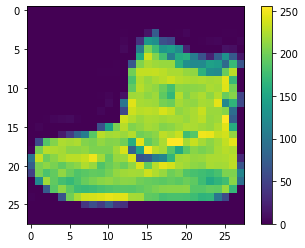

In [9]:
#데이터는 0~ 255로 표현됨
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

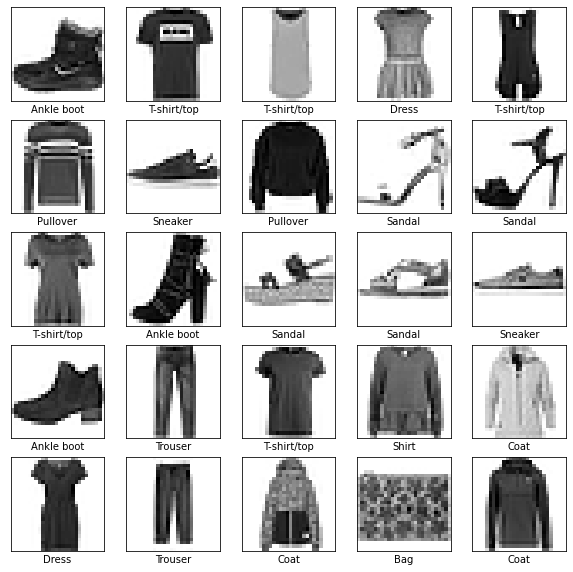

In [11]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 학습하기 

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #28*28 = 784 변환 
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드  #2개로 했을 때와 차이 비교하기 
    keras.layers.Dense(10, activation = 'softmax') #10개의 소프트맥스(확률로 계산, 전체의 합 1)
])


In [120]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

In [121]:
history = model.fit(train_images, train_labels, batch_size = 1000, epochs= 5, validation_data = (test_images, test_labels))

Epoch 1/5
60/60 [==============================] - 13s 219ms/step - loss: 0.7069 - accuracy: 0.7372 - val_loss: 0.4753 - val_accuracy: 0.8305
Epoch 2/5
60/60 [==============================] - 10s 162ms/step - loss: 0.3954 - accuracy: 0.8554 - val_loss: 0.3939 - val_accuracy: 0.8570
Epoch 3/5
60/60 [==============================] - 10s 166ms/step - loss: 0.3345 - accuracy: 0.8772 - val_loss: 0.4260 - val_accuracy: 0.8511
Epoch 4/5
60/60 [==============================] - 10s 166ms/step - loss: 0.3183 - accuracy: 0.8826 - val_loss: 0.3596 - val_accuracy: 0.8691
Epoch 5/5
60/60 [==============================] - 10s 175ms/step - loss: 0.2847 - accuracy: 0.8942 - val_loss: 0.3429 - val_accuracy: 0.8765


평가하기

In [122]:
#test_loss = validation
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.3429 - accuracy: 0.8765


In [123]:
prediction1 = model.predict(test_images)

In [124]:
prediction1[8] #앞의 숫자는 신뢰도 

array([2.6237969e-06, 2.8959963e-07, 2.4188190e-05, 1.5447169e-07,
       3.9467082e-08, 9.9992681e-01, 8.0820911e-07, 4.0943247e-05,
       3.5658736e-06, 5.6562919e-07], dtype=float32)

## 20.7 훈련기록 시각화하기

### training loss, test loss(validation loss)

training_loss = history.history["loss"]

In [125]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [126]:
epoch_count = range(1, len(train_loss) +1 )

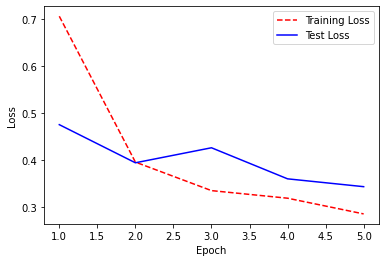

In [127]:
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 정확도

In [128]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

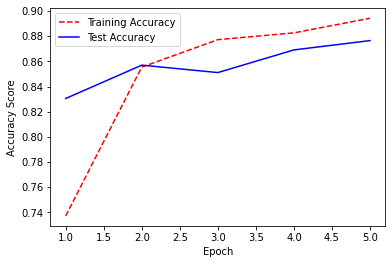

In [129]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## 20.8 가중치 규제로 과대적합 줄이기 (1/3)

In [130]:
model.add(layers.Dense(units = 256, activation = "relu", kernel_regularizer='l1_l2', input_shape = (len(train_loss),)))

## 20.9 조기종료로 과대적합 줄이기 (2/3)

In [131]:
# 학습(fit 이전에)
calbacks = [EarlyStopping(monitor = "val_loss", patience = 2),
           ModelCheckpoint(filepath = "best_model.h5",
                          monitor = "vak_loss",
                          save_best_only = True)]
#callbacks 함수 넣어주기 
history = model.fit(train_images, train_labels, batch_size = 1000, epochs= 5, callbacks = callbacks, 
                    validation_data = (test_images, test_labels))

## 20.10 드롭아웃으로 과대적합 줄이기 (3/3)

In [132]:
# sigmoid 이전에 
model.add(layers.Dropout(0.5))

## 20.11 모델 훈련 진행 과정을 저장하기 

In [134]:
#에폭이 하나 끝날 때마다 저장하기
#콜백 함수를 설정하여 설정 
checkpoint = [ModelCheckpoint(filepath = "models.hdf5")]

history = model.fit(train_images, train_labels, batch_size = 1000, epochs= 5, 
                    callbacks = checkpoint, 
                    validation_data = (test_images, test_labels))

## 20.12 신경망을 K-폴드 교차검증하기 

### 시간이 많이 걸리는 모델일 경우 이를 권장하지 않음. 하루가 걸리는 모델을 10 폴드 교차검증하게 되면 10일이 걸림. 

In [151]:
features= train_images
target = train_labels

In [152]:
len(target)

60000

In [154]:
def create_network():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #28*28 = 784 변환 
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드  #2개로 했을 때와 차이 비교하기 
    keras.layers.Dense(10, activation = 'softmax') #10개의 소프트맥스(확률로 계산, 전체의 합 1)
])
    model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
    return model 

In [155]:
neural_network = KerasClassifier(build_fn = create_network,
                                epochs = 10,
                                batch_size = 100,
                                verbose = 0)

In [156]:
cross_val_score(neural_network,features, target, cv = 3)

array([0.88499999, 0.89055002, 0.89240003])

## 20.13 신경망 튜닝하기 

In [157]:
# GridSearchCV 모델 사용 

In [181]:
def create_network(optimizer = "rmsprop"):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #28*28 = 784 변환 
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),  #128 개의 노드  #2개로 했을 때와 차이 비교하기 
    keras.layers.Dense(10, activation = 'softmax') #10개의 소프트맥스(확률로 계산, 전체의 합 1)
])
    model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
    return model 

In [182]:
neural_network = KerasClassifier(build_fn = create_network, verbose = 0)

In [183]:
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

In [184]:
hyperparameters = dict(optimizer = optimizers, epochs = epochs, batch_size = batches)

In [185]:
grid = GridSearchCV(estimator = neural_network, param_grid = hyperparameters)

In [ ]:
grid_result = grid.fit(features, target)

# Cats vs Dogs

## This notebook is just an extension of what I've learned for the MNIST dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import cv2
import random
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# files = os.listdir('../input/cat-and-dog/training_set/training_set/cats')
# for file in files[5:3000]:
#     print(file)
# #     os.remove(file)
# files = os.listdir('../input/cat-and-dog/training_set/training_set/dogs')
# for file in files[1:3000]:
#     os.remove(file)

# augmentation = ImageDataGenerator(featurewise_center=True, 
#                                   zoom_range=0.3, 
#                                   width_shift_range=0.2, 
#                                   horizontal_flip=True, 
#                                   rotation_range=90,)

# augment_images = augmentation.flow_from_directory("../input/cat-and-dog/training_set/training_set/cats",
#                                                  batch_size=100,
#                                                  class_mode="binary",
#                                                  save_to_dir="../processed/images")



In [ ]:
PATHDIR = "../input/cat-and-dog/"
categories = ["cats","dogs"]

IMG_SIZE = 100




def create_training_data():
    training_data = []
    
    for c in categories:
        for img_name in os.listdir(os.path.join(PATHDIR,"training_set/training_set",c)):
            img_path = os.path.join(PATHDIR,"training_set/training_set",c,img_name)
            img_arr = cv2.imread(img_path,0)
            try:
                resized = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
                norm_arr = resized/255
                training_data.append([norm_arr, categories.index(c)])
            except Exception as e:
                pass
    random.shuffle(training_data)
    return training_data

training_data = create_training_data()
print(len(training_data[0][0]))


In [ ]:
print(len(training_data[0][0][99]))

In [ ]:
X = []
y = []

for f,l in training_data:
    X.append(f)
    y.append(l)

# print(len(X))
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)
# print(X[0])
print(len(X[0][0][0]))
print(X[0][0][0].shape)
y = np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import load_model

In [ ]:
model = Sequential()

#First Layer
model.add(Conv2D(64, (3,3), input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Flatten())

#Second Layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10, activation = "softmax"))

model.summary()



In [ ]:
model.compile(optimizer = "adam",
             loss ="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(X,y, epochs = 20)

In [ ]:
def create_testing_data():
    testing_data = []
    
    for c in categories:
        for img_name in os.listdir(os.path.join(PATHDIR,"training_set/training_set",c)):
            img_path = os.path.join(PATHDIR,"training_set/training_set",c,img_name)
            img_arr = cv2.imread(img_path,0)
            try:
                resized = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
                norm_arr = resized/255
                testing_data.append([norm_arr, categories.index(c)])
            except Exception as e:
                pass
    random.shuffle(testing_data)
    return testing_data

test_data = create_testing_data()

In [ ]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y_test = np.array(y_test)

In [ ]:
model.save("model_save_1")
network = load_model("model_save_1")



network.evaluate(X_test, y_test)



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img_path = "../input/cat-dataset/CAT_00/00000001_005.jpg"
img_arr = cv2.imread(img_path,0)
img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
norm_arr = img_arr/255
pred_img = (norm_arr)
    
    
pred_img = pred_img.reshape(100,100,1)

In [ ]:
test_img = pred_img
test_img = test_img.reshape(1,IMG_SIZE,IMG_SIZE,1)
predict_ = model.predict(test_img)[0]

for i in range(len(predict_)):
    if(predict_[i] == max(predict_)):
        if(i == 0):
            print("This is a CAT!")
        else:
            print("This is a DOG!")
        
plt.imshow(test_img.reshape(IMG_SIZE,IMG_SIZE), cmap='gray')